In [34]:
# Graphs


import tensorflow as tf

import os


def get_section_results(file):
    
    ff = os.listdir(file)
    for fff in ff: 
        print('using file', os.path.join(file, fff))
        eval_returns = []
        eval_std = []
        for e in tf.compat.v1.train.summary_iterator(os.path.join(file, fff)):
            for v in e.summary.value:
                if v.tag == 'Eval_AverageReturn':
                    eval_returns.append(v.simple_value)
                elif v.tag == 'Eval_StdReturn': 
                    eval_std.append(v.simple_value)
        return eval_returns, eval_std

q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-06-06
q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_22-47-49
q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14
q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_22-53-33
q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_22-50-05
q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_22-55-34
/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q1_lb_no_rtg_dsa_CartPole-v0_28-09-2020_10-37-58
using file /userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q1_lb_no_rtg_dsa_CartPole-v0_28-09-2020_10-37-58/events.out.tfevents.1601314678.mind5
/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q1_lb_rtg_dsa_CartPole-v0_28-09-2020_10-38-13
using file /userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q1_lb_rtg_dsa_CartPole-v0_28-09-2020_10-38-13/events.out.tfevents.1601314693.mind6
/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/s

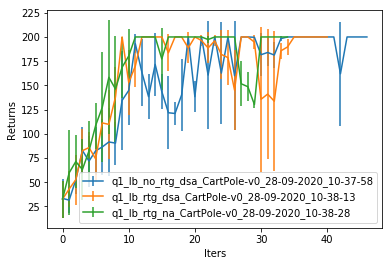

In [35]:
f1 = '/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/q1_lb_no_rtg_dsa_CartPole-v0_27-09-2020_16-10-19' 

data_dir = '/userdata/smetzger/cs285/homework_fall2020/hw2/cs285/scripts/../../data/'
import numpy as np
exps = {}
for runs in os.listdir(data_dir): 
    # go through each run, get the latest one (assume thats the goat)
    exp_name = runs.split('-')[0]
    from datetime import datetime as dt
    
    datestr = runs.split('-')[1:]
    datestr = ('_').join(datestr)[3:]
    a = dt.strptime(datestr, "%d_%m_%Y_%H_%M_%S")
    if 'q3' in runs: 
        print(runs)
    if not exp_name in exps: 
        exps[exp_name] = (runs, a)
    else: 
        date_old = exps[exp_name][1]
        if a > date_old: 
            exps[exp_name] = (runs, a)
            
import matplotlib.pyplot as plt
import collections
exps = collections.OrderedDict(sorted(exps.items()))
for k, v in exps.items(): 
    if 'q1_lb' in k: 
        v = list(v)
#         v[0] = 'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14'
        print(data_dir + v[0])#'q3_b40000_r0.005_LunarLanderContinuous-v2_27-09-2020_23-03-14')
        returns = []
        returns, stds= get_section_results(data_dir + v[0])
        plt.errorbar(np.arange(len(returns)), returns, yerr=stds, label = v[0])
        plt.xlabel('Iters')
        plt.ylabel('Returns')
        plt.legend()
plt.show()
        
# plt.savefig('./5_q1_lb')
# plt.show()